In [1]:
from torch import normal
from torch import tensor
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    transforms.Resize((255, 255))])

celebs=datasets.CelebA(root='./celeb/', 
                       transform=transform,
                       download=True)

Files already downloaded and verified


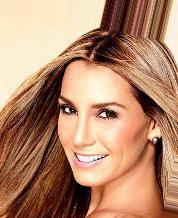

In [3]:
import torchvision as tv
display_trans=tv.transforms.ToPILImage()

# Returns PIL Image from tensor data with pixel RGB values ranging from -1 to 1
def tensorToImage(t):
    display_trans=tv.transforms.ToPILImage()
    return display_trans((t+1)/2)

tensorToImage(celebs[0][0])

In [4]:
# tensor of feature attributes
celebs[0][1]

tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [23]:
import torch
im=celebs[0][0]
im.shape

torch.Size([3, 218, 178])

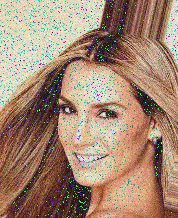

In [6]:
from math import sqrt
# example run of adding gaussian noise to image
var=0.02
im=normal(mean=sqrt(1-sqrt(0.1))*im, std=sqrt(var))

tensorToImage(im)

In [7]:
from math import sqrt
# adds noise to image with var and shifts mean towards 0 using sqrt(1-var)
def add_noise(image, var):
    return normal(mean=sqrt(1-var)*image, std=sqrt(var))


In [8]:
im=celebs[0][0]

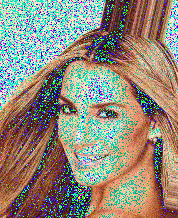

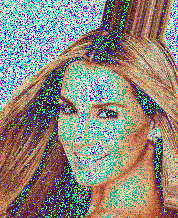

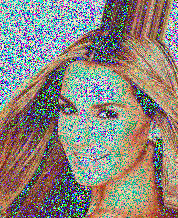

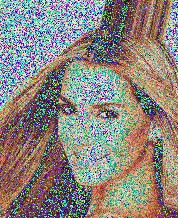

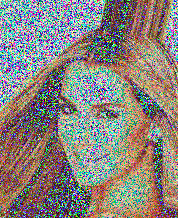

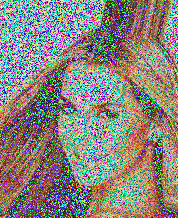

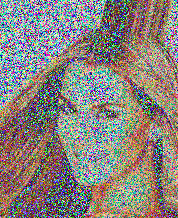

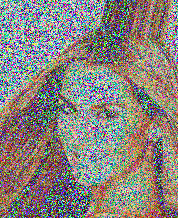

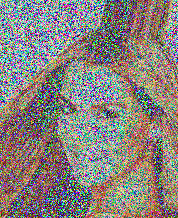

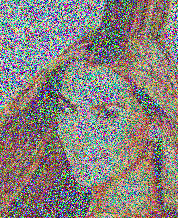

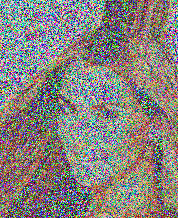

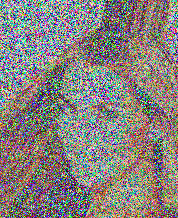

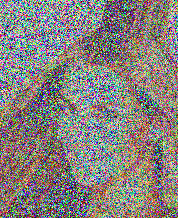

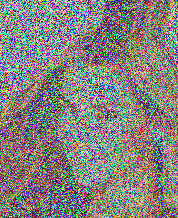

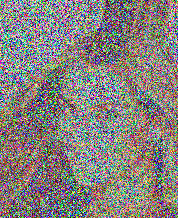

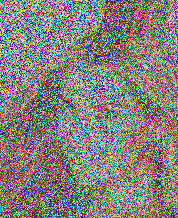

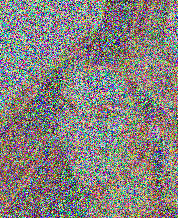

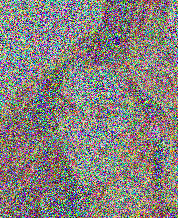

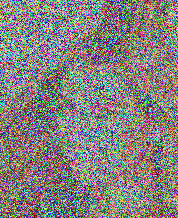

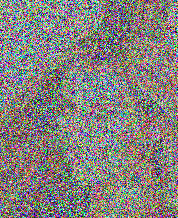

In [9]:
images=[]
for i in range(20):
    im=add_noise(im, 0.02)
    images.append(im)
display(*[tensorToImage(x) for x in images])

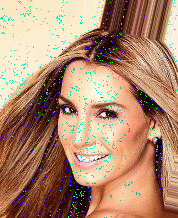

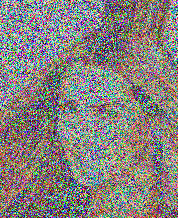

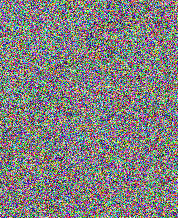

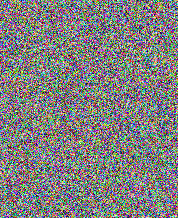

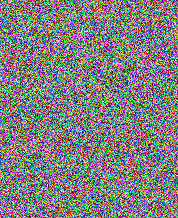

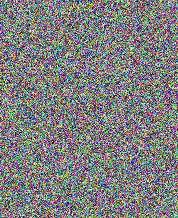

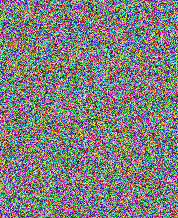

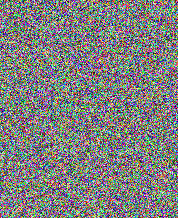

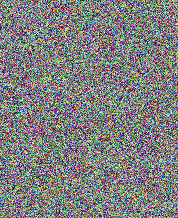

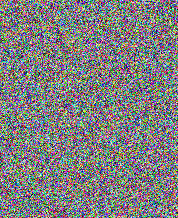

In [10]:
im=celebs[0][0]
# adds gaussian noise to image sequentially following var_scheduler variance
def forward_process(image, var_scheduler=torch.linspace(start=1e-4, end=0.5, steps=100)):
    images=[]
    for var in var_scheduler:
        image=add_noise(image, var)
        images.append(image)
    return images

# puts image through forward process then prints each iteration of process
images=forward_process(im)
display(*[tensorToImage(x) for i, x in enumerate(images) if i%10==0])
    

In [61]:
from torch import nn

# Returns double convolution model with output of shape num_filters x H x W
def double_conv(in_channels, num_filters):
    return 

# Takes in input and number of filters desired and returns output of double convolution with shape N x num_filters x H x W
def conv_block(input, num_filters):
    in_chan = input.shape[1] if len(input.shape)==4 else input.shape[0]
    return nn.Sequential(
        nn.Conv2d(in_channels=in_chan, out_channels=num_filters, kernel_size=(3, 3), bias=False, padding="same"),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=num_filters, out_channels=num_filters, kernel_size=(3, 3), bias=False, padding="same"),
        nn.ReLU(inplace=True)
    )(input)

conv_block(celebs[0][0], 64)


tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0170, 0.0788,  ..., 0.1514, 0.1697, 0.1446],
         [0.0000, 0.1426, 0.1552,  ..., 0.1167, 0.1383, 0.1228],
         [0.0000, 0.0000, 0.0534,  ..., 0.0549, 0.0357, 0.0543]],

        [[0.0336, 0.0000, 0.0543,  ..., 0.0542, 0.0095, 0.0000],
         [0.1036, 0.0000, 0.0000,  ..., 0.0046, 0.0000, 0.0000],
         [0.1167, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0190,  ..., 0.0000, 0.0000, 0.0000],
         [0.0223, 0.0123, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0015, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0132, 0.

In [62]:
from torch.utils import data

# Getting random samples from celebs dataset
random_sampler = data.RandomSampler(celebs, num_samples=10)
dataloader = data.DataLoader(celebs, batch_size=10, sampler=random_sampler)

# Turning dataloader object into a tensor so it is passable into conv_block for testing
celeb_tensor=tensor([])
for i, d in enumerate(dataloader):
    celeb_tensor=torch.cat((celeb_tensor, d[0]), 0)
celeb_tensor.shape

torch.Size([10, 3, 218, 178])

In [63]:
x=conv_block(celeb_tensor, 64)
print(x.shape)
x=conv_block(x, 128)
print(x.shape)
x=conv_block(x, 256)
print(x.shape)

torch.Size([10, 64, 218, 178])
torch.Size([10, 128, 218, 178])
torch.Size([10, 256, 218, 178])


In [64]:
def down_block(input, num_filters):
    x=conv_block(input, num_filters)
    return x, nn.MaxPool2d(kernel_size=(2,2))(x)

down=down_block(celeb_tensor, 64)
print(down[0].shape, down[1].shape)

torch.Size([10, 64, 218, 178]) torch.Size([10, 64, 109, 89])


In [65]:
num_filters=64
x1, d1=down_block(celeb_tensor, num_filters)
x2, d2=down_block(d1, num_filters*2)
x3, d3=down_block(d2, num_filters*4)
x4, d4=down_block(d3, num_filters*8)
print(x4.shape, d4.shape)

torch.Size([10, 512, 27, 22]) torch.Size([10, 512, 13, 11])


In [66]:
def up_block(input, skip_connection, num_filters):
    # upsample input
    upsample=nn.functional.interpolate(input=input, scale_factor=2)
    # pad where needed to make sure upsample is same dimension as skip_connection
    diffH=skip_connection.shape[2]-upsample.shape[2]
    diffW=skip_connection.shape[3]-upsample.shape[3]
    upsample=nn.functional.pad(input=upsample, pad=[diffW//2, diffW-diffW//2, diffH//2, diffH-diffH//2])
    #concatenate skip connection with upsample and then return the double convolution of it
    cat=torch.cat([skip_connection, upsample], dim=1)
    return conv_block(cat, num_filters)


In [80]:
# TESTING UPBLOCK
x1, d1=down_block(celeb_tensor, num_filters)
print(x1.shape, d1.shape)
x2, d2=down_block(d1, num_filters*2)
print(x2.shape, d2.shape)
x3=conv_block(d2, num_filters*4)
print(x3.shape)
u1=up_block(x3, x2, num_filters*2)
print(u1.shape)

torch.Size([10, 64, 218, 178]) torch.Size([10, 64, 109, 89])
torch.Size([10, 128, 109, 89]) torch.Size([10, 128, 54, 44])
torch.Size([10, 256, 54, 44])
torch.Size([10, 128, 109, 89])


In [ ]:
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
    
    def forward(self, x):
        x1, d1=down_block(x, 64)
        x2, d2=down_block(d1, 128)
        x3, d3=down_block(d2, 256)
        x4, d4=down_block(d3, 512)
        bottom=conv_block(d4, 1024)
        up1=up_block(bottom, x4, 512)
        up2=up_block(up1, x3, 256)
        up3=up_block(up2, x2, 128)
        up4=up_block(up3, x1, 64)
        return nn.Conv2d(in_channels=up4.shape[1], out_channels=up4.shape[1], kernel_size=1)(up4)
    